# Credit score from kaggle

## Prehistory

In this work I use my own developed packages (only matplotlib is external for drawing purpose). I decided that this might shows my software skills from a better propspective, assuming nowadays many ML packages allow you to deploy ready cool model in just few lines of code. I hope that make sense for you, cheers.

For this data and work, logistic regression is very sufficient model selection due to its simplicity and statistical approach of defining the bounding curve. Logistic Regression is implemented based on Gradient Descent.

[Results](#id_1)

## Initialization

### Upload packages.

In [1]:
import logistic_regression as lr
import data_reader as dr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from helper_methods import *


### Explore data. 
Kaggle already gave an understanding about credit date. Assuming numerical data and only 2 categories to select, we are going to use Linear Regression. Let's upload data. 

Note: line with 'NA' value in 'MonthlyIncome' will be skipped. This will lead to using only 80% of the given data in training-set. But, it has to be okay for that project. 

In [2]:
main_data = dr.DataTable("data/cs-training.csv")

In [3]:
main_data.head

['',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

### Select, what we want to predict.

In [4]:
target_name = "SeriousDlqin2yrs"
main_data.select_target(target_name)
main_data.target[target_name].data[0:5]


Target SeriousDlqin2yrs was added


[1.0, 0.0, 0.0, 0.0, 0.0]

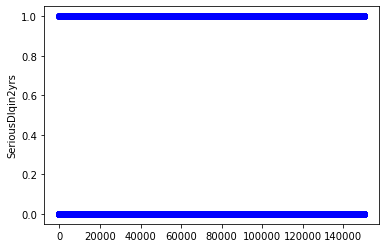

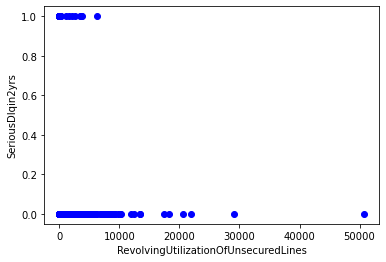

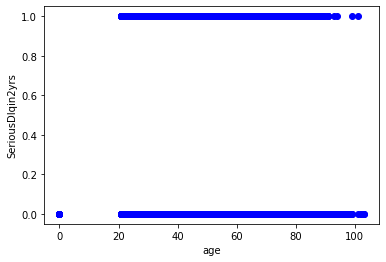

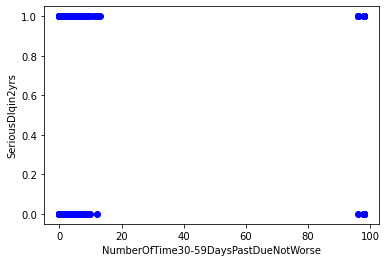

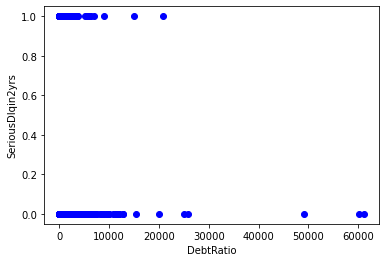

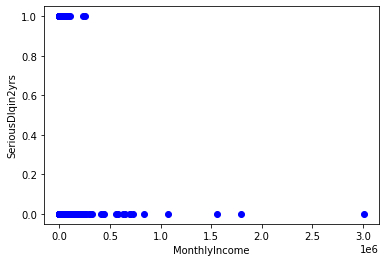

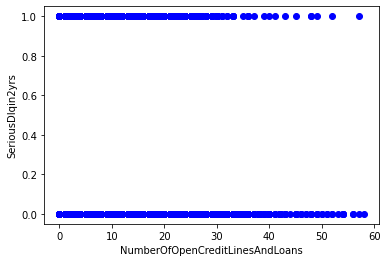

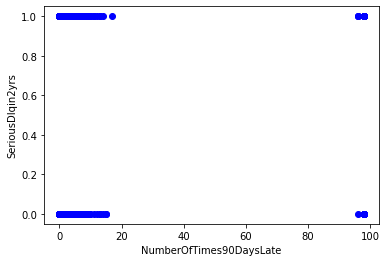

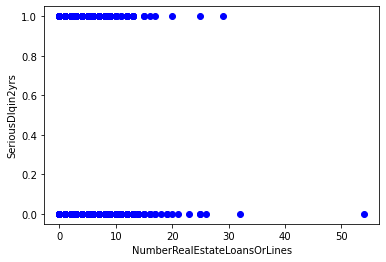

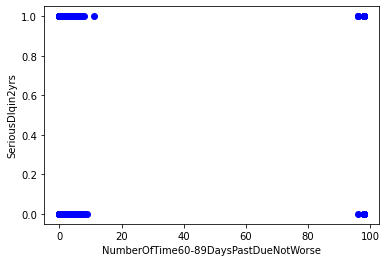

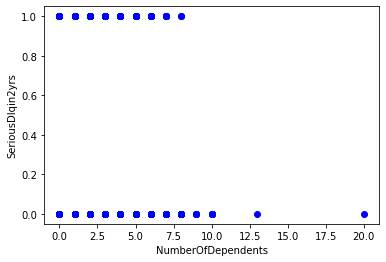

In [5]:
# draw attitudes all numerical column data to our selected target
main_data.plot(all2target=True)

## Feature selection
Now, we have to select features for our model. 

From kaggle data visualization, we can make an assumtion that some feature can be higly correlated, dependent and interchangeable. Let's find it out.

For current data and project, we can go with graphical approach and to guess, which feature/attitudes are the best.

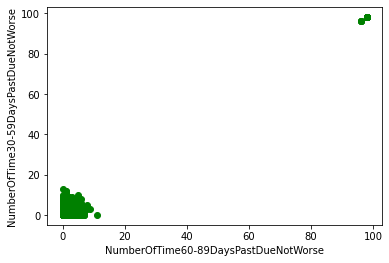

In [6]:
main_data.plot('NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse')

We can see that 'NumberOfTime60-89DaysPastDueNotWorse' and 'NumberOfTime30-59DaysPastDueNotWorse' are interchangeable. So, we can use only 1 feature instead of using 2 to simplify our model.

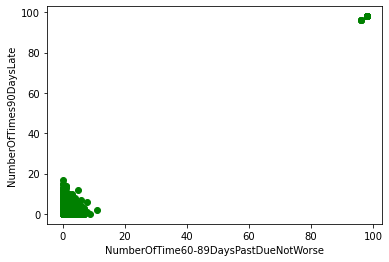

In [7]:
main_data.plot('NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate')

Same for 'NumberOfTimes90DaysLate'. Let's then use only 'NumberOfTime30-59DaysPastDueNotWorse' as our only 1 feature from 3 above.

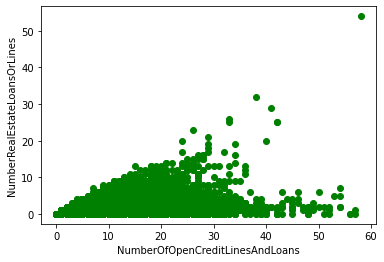

In [8]:
main_data.plot('NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines')

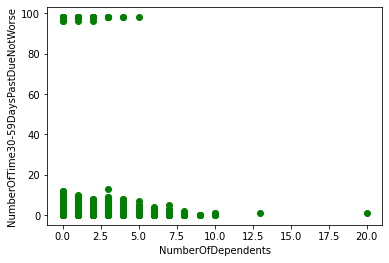

In [9]:
main_data.plot('NumberOfDependents', 'NumberOfTime30-59DaysPastDueNotWorse')

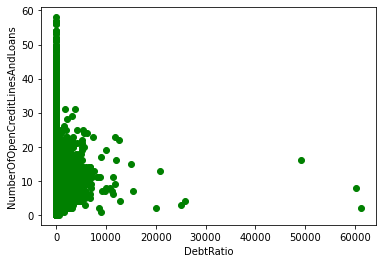

In [10]:
main_data.plot('DebtRatio', 'NumberOfOpenCreditLinesAndLoans')

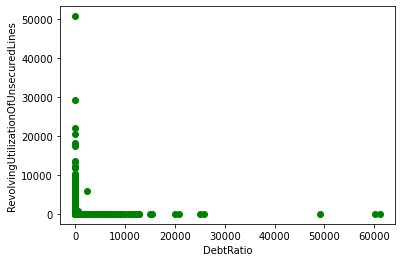

In [11]:
main_data.plot('DebtRatio', 'RevolvingUtilizationOfUnsecuredLines')

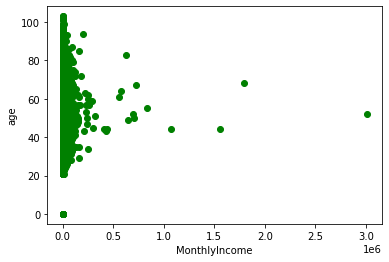

In [12]:
main_data.plot('MonthlyIncome', 'age') # we can see some (0,0) error, but it's fine for that work.

### Feature ourcome
Based on our exploration above, we will use the following feature:

'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents'

In [13]:
list_of_features =  ['RevolvingUtilizationOfUnsecuredLines',
                     'age',
                     'NumberOfTime30-59DaysPastDueNotWorse',
                     'DebtRatio',
                     'MonthlyIncome',
                     'NumberOfOpenCreditLinesAndLoans',
                     'NumberRealEstateLoansOrLines',
                     'NumberOfDependents']

main_data.activate_features(list_of_features)  # this will add features to model for training

Feature RevolvingUtilizationOfUnsecuredLines was added
Feature age was added
Feature NumberOfTime30-59DaysPastDueNotWorse was added
Feature DebtRatio was added
Feature MonthlyIncome was added
Feature NumberOfOpenCreditLinesAndLoans was added
Feature NumberRealEstateLoansOrLines was added
Feature NumberOfDependents was added


## Normalization
At that very moment we see that our data in not normalized, and to ensure the best training experience, let's do scale for range -1...1 all our data based on their min-max values.

In [14]:
main_data.max_scaling()

Column  was scaled
Column SeriousDlqin2yrs was scaled
Column RevolvingUtilizationOfUnsecuredLines was scaled
Column age was scaled
Column NumberOfTime30-59DaysPastDueNotWorse was scaled
Column DebtRatio was scaled
Column MonthlyIncome was scaled
Column NumberOfOpenCreditLinesAndLoans was scaled
Column NumberOfTimes90DaysLate was scaled
Column NumberRealEstateLoansOrLines was scaled
Column NumberOfTime60-89DaysPastDueNotWorse was scaled
Column NumberOfDependents was scaled


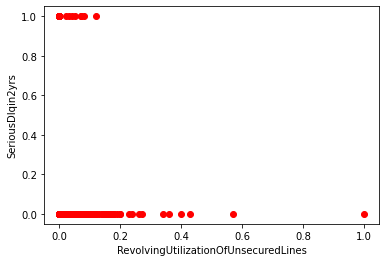

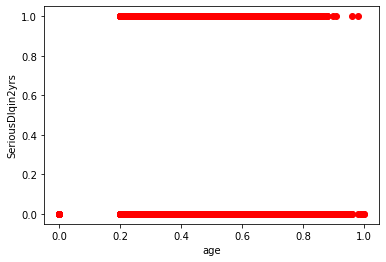

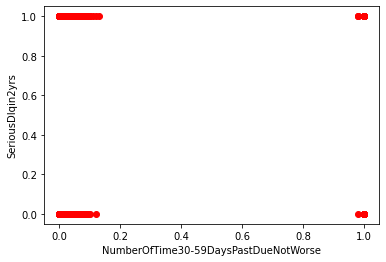

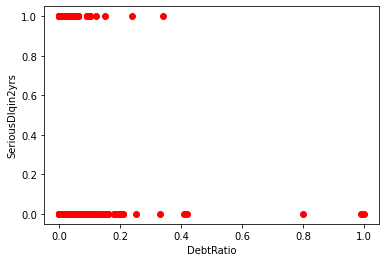

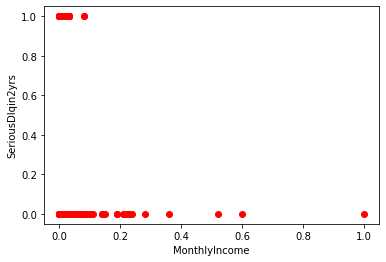

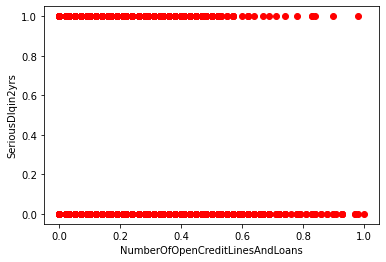

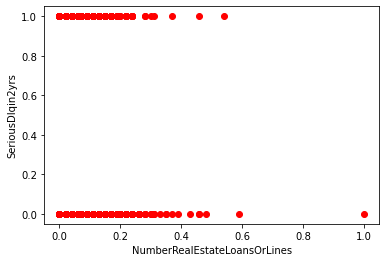

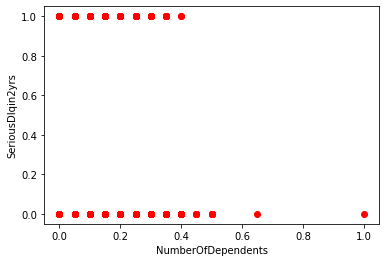

In [15]:
main_data.plot(features2target=True)  # compare to results above

## Logistic Regression

Let's do model training. First, let's split data onto training and testing data with 70:30 ratio.

In [16]:
#  do shuffling and split data onto 2 parts with 70:30 ratio
main_data.split_data(0.7, shuffle=True)

Shuffle was done
Data was split as follows: 0.7 training set and 0.30000000000000004 testing set


In [17]:
training_data = main_data.get_training_data()  # returns (features data, target data)
# cv_data = main_data.get_cv_data()
testing_data = main_data.get_testing_data()

In [18]:
data_labels = main_data.get_labels() # get labels for data which is used for training
data_labels

(['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberRealEstateLoansOrLines',
  'NumberOfDependents'],
 'SeriousDlqin2yrs')

In [19]:
# init LR model
ai_model = lr.LogisticRegression()

In [67]:
# apply our data to our model
ai_model.set_training_data(training_data[0], training_data[1])
ai_model.set_testing_data(testing_data[0], testing_data[1])
ai_model.set_labels(data_labels)  # set labels of our data into the model

## Training

In my LR implementation, we have to set manually the following settings:

In [68]:
ai_model.RANDOM_WEIGHT_INITIALIZATION = 10  # set max value of initial model coeeficients
ai_model.epoch = 20  # set number of training iterations
ai_model.alpha = 0.3  # learning rate
ai_model.regularization = 0.1  # penalty rate L2 Lasso

In [69]:
# turn on logging during training for debugging purpose
ai_model.log_mode(False)

Log mode is disabled


In [70]:
# do training
ai_model.fit()

Initiated coefficients are [3, 5, 7, 10, 1, 7, 9, 4, 6]
Iteration 6 done
Iteration 11 done
Iteration 16 done
Training is completed with 20 iterations


[-2.36, 5.0, 2.79, 9.96, 1.0, 7.0, 7.47, 3.72, 5.59]

## Evaluation

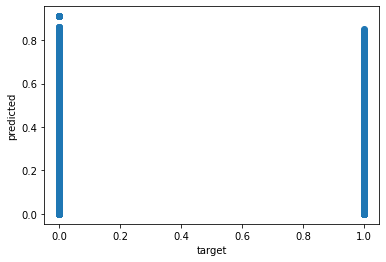

In [71]:
predicted = []
test_features, test_target = testing_data
for idx in range(len(test_features)):
    feature_line = test_features[idx]
    
    # do predict for each line/case
    predicted.append(ai_model.predict(feature_line, raw_output=True))
    

# plt.scatter(axis1, testing_target, label="Target")
plt.scatter(test_target, predicted)
# plt.legend(loc=loc_place)
plt.xlabel("target")
plt.ylabel("predicted")
plt.show()

In [72]:
ai_model.logistic_threshold = 0.47
cm, precision, recall = ai_model.evaluation(testing_data, metric="confusion_matrix")
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
f1_score = 2 * (precision * recall) / (precision + recall)
print("Confusion matrix {}".format(cm))
print("Precision is {} and recall is {}".format(precision, recall))
print("Accuracy is", accuracy)
print("F1 score is", f1_score)

Confusion matrix [[0.02, 0.45], [0.03, 0.49]]
Precision is 0.04977886515479439 and recall is 0.40960123886953154
Accuracy is 0.5151515151515151
F1 score is 0.08876955992784327


For next evaluation, I'll use several external libs.

In [73]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(test_target, predicted)

In [74]:
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.417


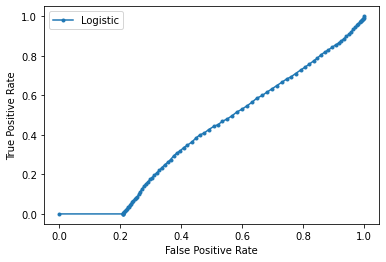

In [75]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

lr_fpr, lr_tpr, _ = roc_curve(test_target, predicted)

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Results <a id='id_1'></a>

Logistic: ROC AUC=0.446. I'm out of top 100 leaderboard for sure.

We can see that my gradient descent implementation and parameter selection were quite weak to achieve at least half of AUC. Definitely, this algorithm has to be improved.

# Question answeres from email

### About evaluation techniques
We could see that we have much lower cases of not returning loans rather returning credits back. This characteristic distorts proper trade-off between recall and precision. We would like to have high precision, but in that case we might have much lower recall, and vice versa. This can lead to the following: we can give loan to everybody, and our accuracy is still great, but what the point of that AI model then? Or, we can stop giving loan at all and we will have the highest recall, but 0 accuracy.

The area under the curve recall-precision represents efficiency of these 2 parameters combitation. AUC (area under curve) gives that value for specific trainined model. This shows have model behaviours for different logistic thresholds. F1 score can be suitable as well for such purpose.

For this problem, instead of supervised learning, I would apply **Anomaly Detection**, because there are much less negative samples (no returned credit) vs positive samples.

